## Welcome to StereoSiTE

**StereoSiTE** is a package for the analysis and visualization of spatial transcriptome data.
It builds on top of [anndata](https://anndata.readthedocs.io/en/stable/), [scanpy](https://scanpy.readthedocs.io/en/stable/) and [squidpy](https://squidpy.readthedocs.io/en/stable/), from which it inherits modularity and scalability.
It provides analysis tools to dissect cellular neighborhood based on cell composition and quantitatively identify cell-cell communication in spatial.
The following fuctions have been included in stereosite:
- **Data transform** : Transform data from gene expression matrix(gem) to anndata.

- **Cell annotation** : Annotate cellbin or square bin.

- **Cellular Neighborhood (CN)** : Identify specific cellular neighborhood region base on the cellular composition of each window.

- **Spatial Cell Interaction Intensity (SCII)** : Infer spatial cell-cell interaction based on the location and expression of ligand-receptor genes.

### Tutorial

In this tutorial, we apply stereosite to analyze a stereo-seq data of a xenograft model (mouse CT26).

Before executing StereoSiTE, you need transfer StereoSiTE(mirror) from the public repository to your personal environment. Switch kernel python3.9.12.

#### Input and output

- **Input**
    1. **gem**：Gene expression matrix.

    2. **mask**：If the cellbin mask file generated from ssDNA image was given, the cellbin data will be extracted from gem.

- **Output**
    1. **.h5ad**: Anndata with annotation or CN cluster information.
    
    2. **.pickle**: Interaction result generated by SCII.
    
    3. **figures**: Figures.
    
#### Demo data & citation

If you use [stereosite](https://github.com/STOmics/stereosite) in your work, please cite the publication as follows:

 **StereoSiTE: A framework to spatially and quantitatively profile the cellular neighborhood organized iTME**

    Xing Liu, Chi Qu, Chuandong Liu, Na Zhu, Huaqiang Huang, Fei Teng, Caili Huang, Bingying Luo, Xuanzhu Liu, Yisong Xu, Min Xie, Feng Xi, Mei Li, Liang Wu, Yuxiang Li, Ao Chen, Xun Xu, Sha Liao, Jiajun Zhang

    bioRxiv 2022.12.31.522366; doi: https://doi.org/10.1101/2022.12.31.522366

### Time Estimate
Below is an example of the time running workflow with the demo data. GPU needed.

| Sample size | CPU Core | CPU Memory(G) | GPU Memory(G) | Running Time(min) |
|:-----------:|:--------:|:-------------:|:-------------:|:-----------------:|
|22Mb         |10        |~60            |~40            |~30                |


In [1]:
#from sklearn.ensemble import RandomForestRegressor
import numpy as np
import anndata
import sys, os
import pandas as pd
import stereosite
import matplotlib.pyplot as plt
import tifffile

## Load data
Read gene expression matrix and transform it to anndata

In [2]:
from stereosite.read.gem import Gem_Reader
gem_file = "./data/SS200000681TL_A1.tissue.part.gem.gz"
gem_reader = Gem_Reader(gem_file)
adata_bin200 = gem_reader.gem2anndata(200)
adata_bin200_file = "./data/SS200000681TL_A1_bin200.h5ad"
adata_bin200.write(adata_bin200_file)
adata_bin200

/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/read/gem.py:112: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X = expMtx, obs = obs, var = var)
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 326 × 16901
    obs: 'x', 'y'
    obsm: 'spatial'

## Deconvolution

2024-04-23 15:23:00.245420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Global seed set to 0
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/chex/_src/pytypes.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_ran

Anndata setup with scvi-tools version 0.18.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │  326  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 10112 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 1/5000:   0%|                                                                                                                                                                                                 | 0/5000 [00:00<?, ?it/s]

/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/torch/distributions/gamma.py:71: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /home/liuxing2/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  self.rate * value - torch.lgamma(self.concentration))


Epoch 5000/5000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [04:44<00:00, 16.57it/s, v_num=1, elbo_train=2.74e+6]

`Trainer.fit` stopped: `max_epochs=5000` reached.


Sampling global variables, sample: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:12<00:00, 82.03it/s]


<Figure size 432x288 with 0 Axes>

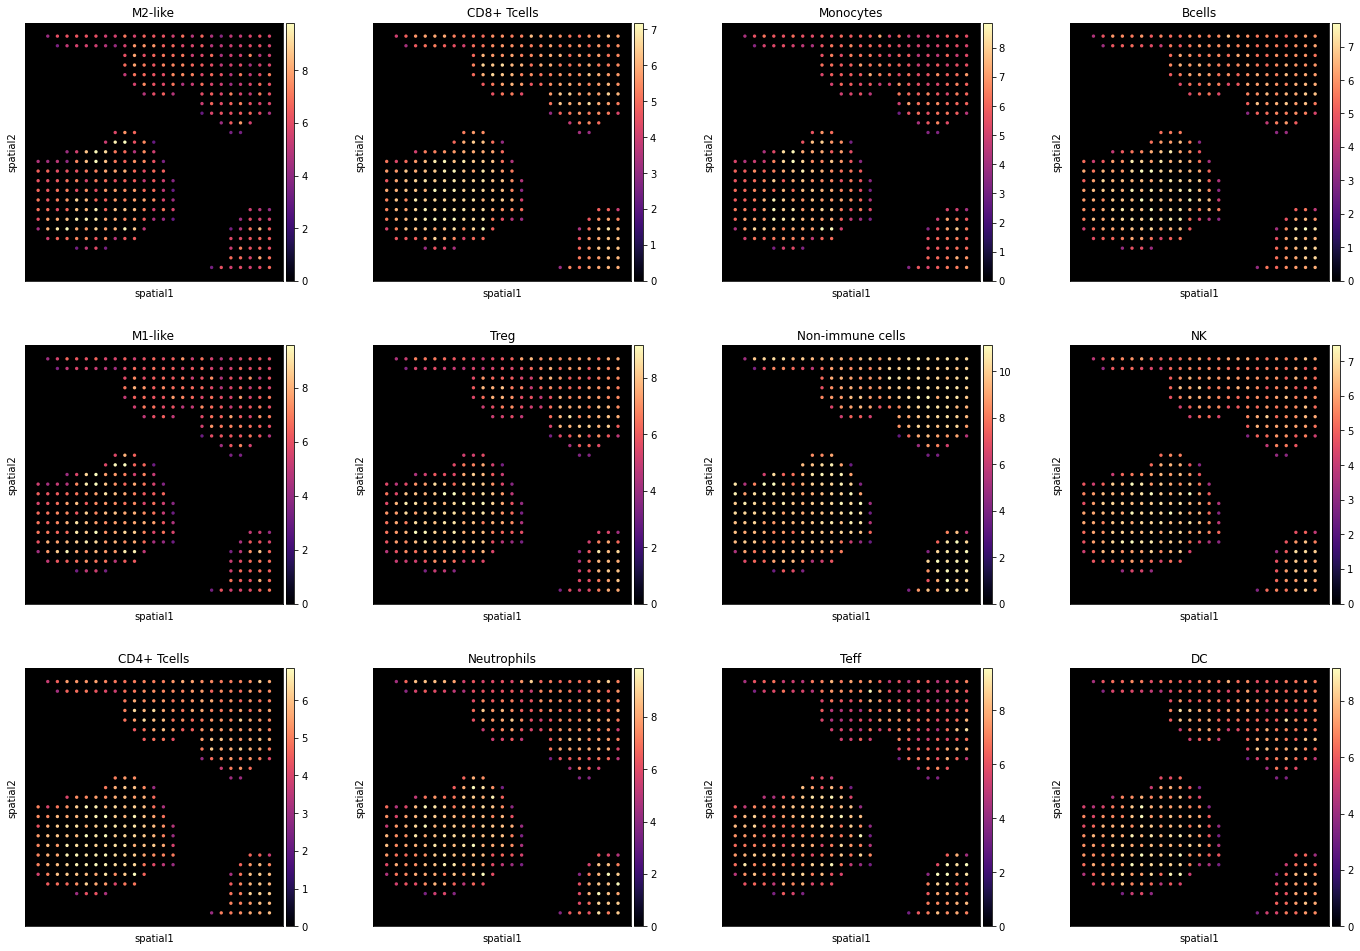

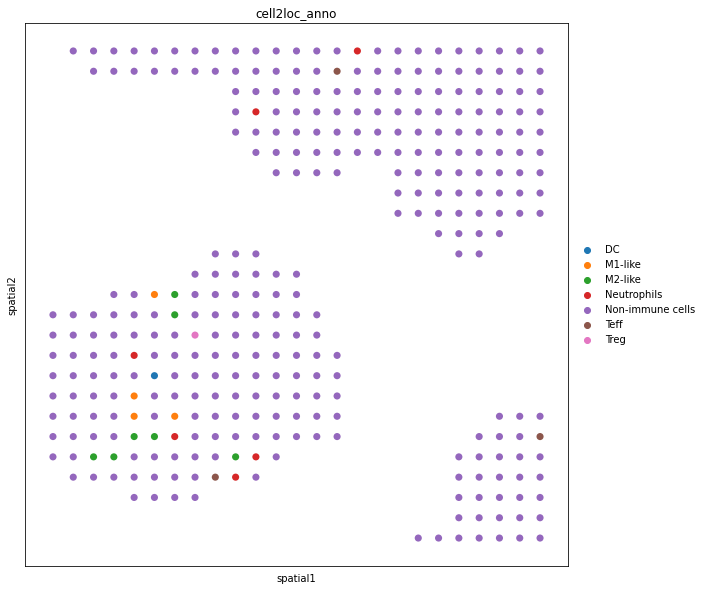

  0%|                                                                                                                                                                                                                  | 0/7 [00:00<?, ?it/s]/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
 29%|█████████████████████████████████████████████████████████▋                                                                  

AnnData object with n_obs × n_vars = 326 × 10112
    obs: 'x', 'y', '_indices', '_scvi_batch', '_scvi_labels', 'Bcells', 'CD4+ Tcells', 'CD8+ Tcells', 'Non-immune cells', 'DC', 'M1-like', 'M2-like', 'Monocytes', 'NK', 'Neutrophils', 'Teff', 'Treg', 'cell2loc_anno'
    var: 'MT_gene'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'mod', 'cell2loc_anno_colors'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

<Figure size 576x576 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [3]:
from stereosite.cn.deconvolution import Cell2location
ref_file = "./data/CT26_scCell_reference.csv"
adata_file = "./data/SS200000681TL_A1_bin200.h5ad"
out_dir = "./data/deconvolution/bin200"
cell2loc = Cell2location(ref_file, adata_file, out_dir = out_dir, bin_size = 200, gpu = 0)
cell2loc.run_deconvolution()

## CN (based on deconvolution result)
Analyze the Cellular Neighborhood based on the deconvolution result

Result will be stored in adata.obs['cell_neighbor']

In [4]:
from stereosite.cn.cellneighbor import cn_deconvolve
adata_anno_file = "./data/deconvolution/bin200/cell2location_map/sp.h5ad"
adata_anno = anndata.read(adata_anno_file)
cn_deconvolve(adata_anno, use_rep='q05_cell_abundance_w_sf', resolution=0.1)

In [5]:
#Write the result into h5ad file
adata_anno_cn_file = "./data/out/bin200_adata_anno_cn.h5ad"
adata_anno.write(adata_anno_cn_file)

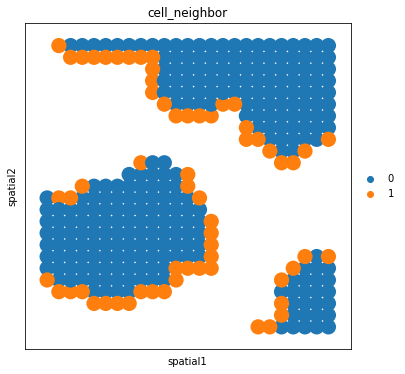

In [6]:
from stereosite.plot.cellneighbor import umap, heatmap, spatial
spatial(adata_anno, spot_size = 200)

/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


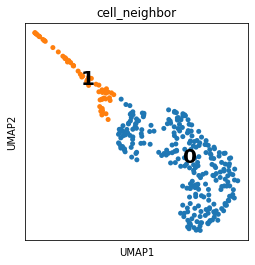

In [7]:
umap(adata_anno, size=100, color="cell_neighbor", figsize=(4, 4), legend_loc="on data")

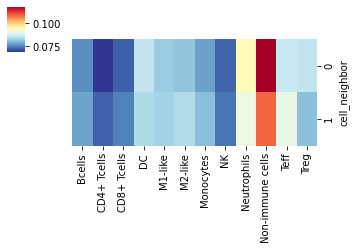

In [8]:
heatmap(adata_anno)

## Cellbin
Generate anndata file at single-cell resolution and annotate it using cell2location

In [9]:
from stereosite.read.gem import Gem_Reader
gem_file = "./data/SS200000681TL_A1.tissue.part.gem.gz"
gem_reader = Gem_Reader(gem_file)

#If cellbin mask was available, use mask to extract gene expression matrix of each cell.
mask_file = "./data/SS200000681TL_A1_mask.part.tif"
adata = gem_reader.gem_with_cellmask_2anndata(mask_file)
adata_file = "./data/SS200000681TL_A1_cellbin.h5ad"
adata.write(adata_file)
adata

/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/read/gem.py:142: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X = expMtx, obs = obs, var = var)
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/read/gem.py:147: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  spatialdf[self.cell_label_key].cat.reorder_categories(cel

AnnData object with n_obs × n_vars = 13233 × 14524
    obsm: 'spatial'

In [ ]:
#If cellbin mask was not available, bin20 can be used to represent the annotation in single cell resolution.
adata = gem_reader.gem2anndata(bin_size=20)
adata_file = "./data/SS200000681TL_A1_bin20.h5ad"
adata.write(adata_file)
adata

Anndata setup with scvi-tools version 0.18.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 13233 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 9744  │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 5000/5000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [08:23<00:00, 10.07it/s, v_num=1, elbo_train=4.14e+6]

`Trainer.fit` stopped: `max_epochs=5000` reached.


Sampling global variables, sample: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:14<00:00, 70.90it/s]


<Figure size 720x720 with 0 Axes>

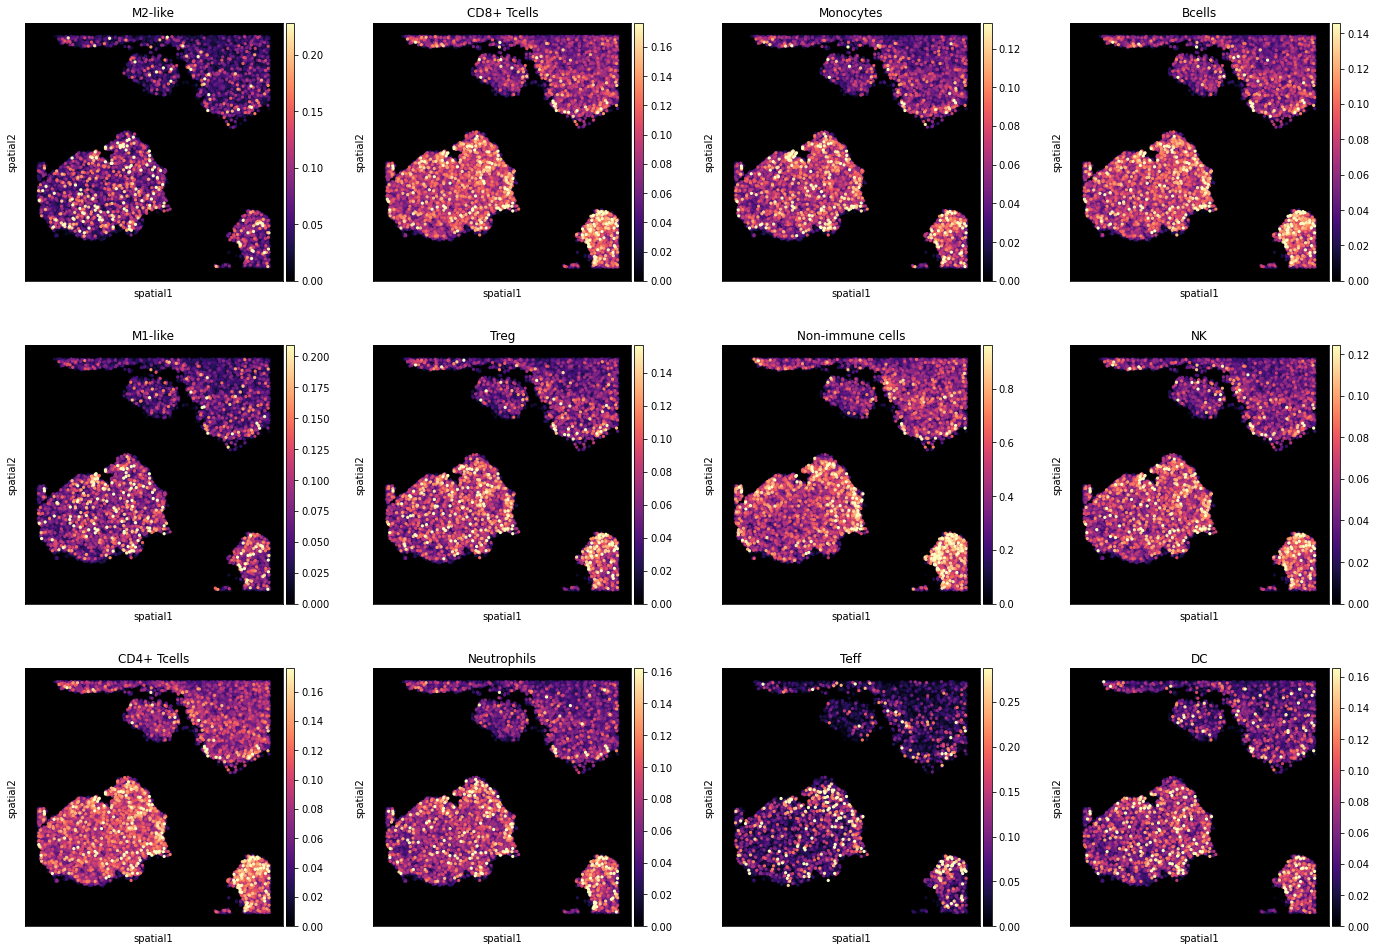

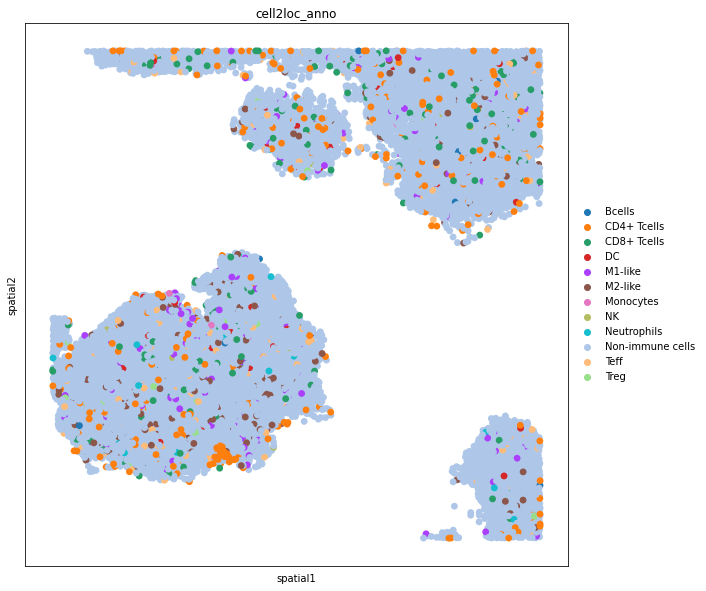

  0%|                                                                                                                                                                                                                 | 0/12 [00:00<?, ?it/s]/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
  8%|████████████████▊                                                                                                                                                                                        | 1/12 [00:01<00:13,  1.20s/it]/home/liuxing2/.conda/envs/liuxing2_cell2loc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. U

AnnData object with n_obs × n_vars = 13233 × 9744
    obs: '_indices', '_scvi_batch', '_scvi_labels', 'Bcells', 'CD4+ Tcells', 'CD8+ Tcells', 'Non-immune cells', 'DC', 'M1-like', 'M2-like', 'Monocytes', 'NK', 'Neutrophils', 'Teff', 'Treg', 'cell2loc_anno'
    var: 'MT_gene'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'mod', 'cell2loc_anno_colors'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

<Figure size 576x576 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [10]:
from stereosite.cn.deconvolution import Cell2location
ref_file = "./data/CT26_scCell_reference.csv"
out_dir = "./data/deconvolution/cellbin"
cell2loc = Cell2location(ref_file, adata_file, out_dir = out_dir, bin_size = 1, gpu = 0)
cell2loc.run_deconvolution()

Global seed set to 0
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/flax/struct.py:133: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/flax/struct.py:133: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the py

Anndata setup with scvi-tools version 0.18.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 13489 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 10177 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
LOCAL_RANK: 0 - 

Epoch 1/5000:   0%|                                                                                                                        | 0/5000 [00:00<?, ?it/s]

/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/torch/distributions/gamma.py:71: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /home/liuxing2/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  self.rate * value - torch.lgamma(self.concentration))


Epoch 5000/5000: 100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [08:15<00:00,  9.20it/s, v_num=1, elbo_train=1.28e+7]

`Trainer.fit` stopped: `max_epochs=5000` reached.


Sampling global variables, sample: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:13<00:00, 73.80it/s]


<Figure size 640x480 with 0 Axes>

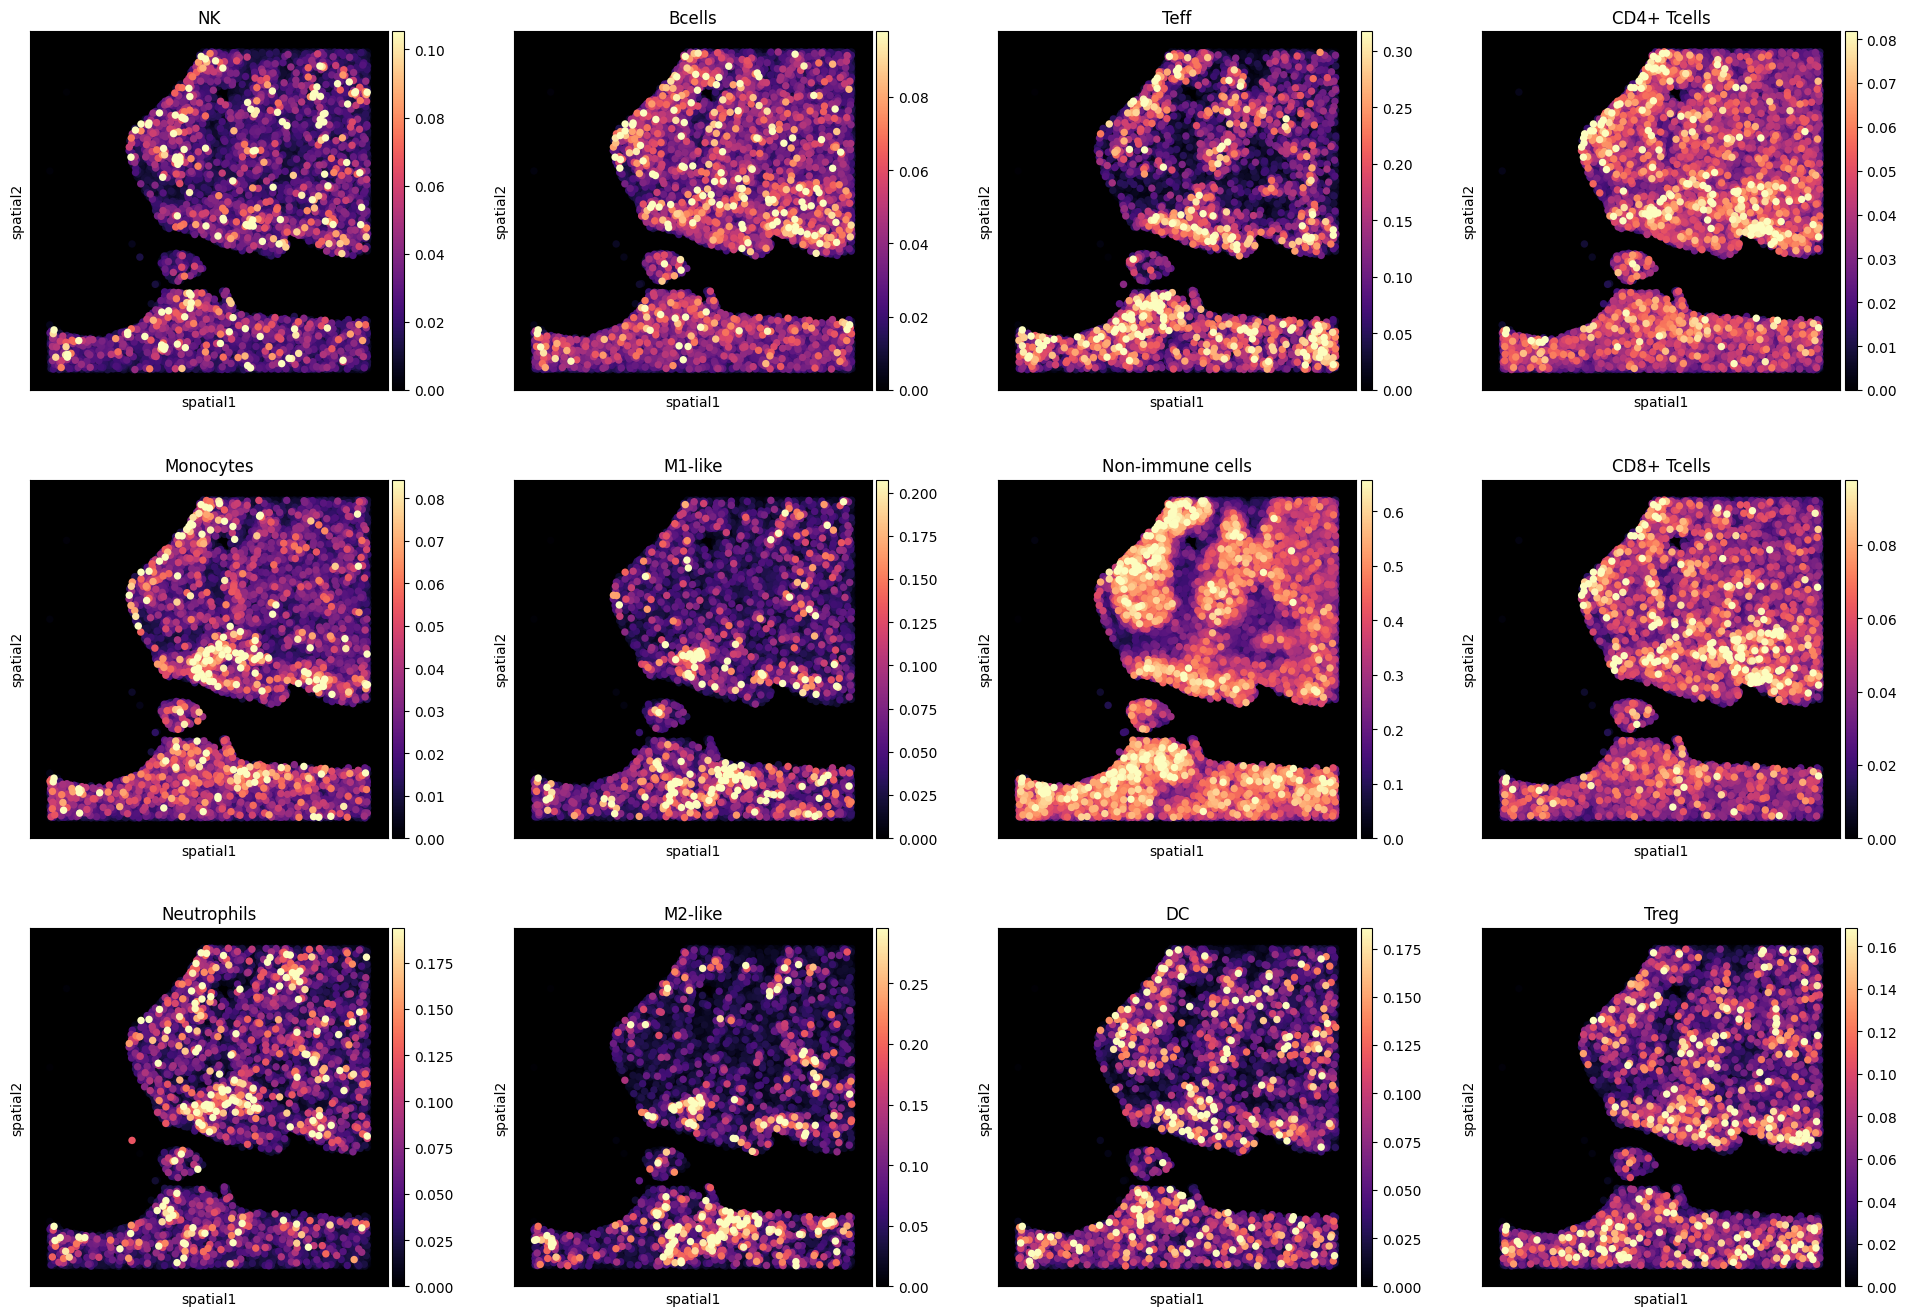

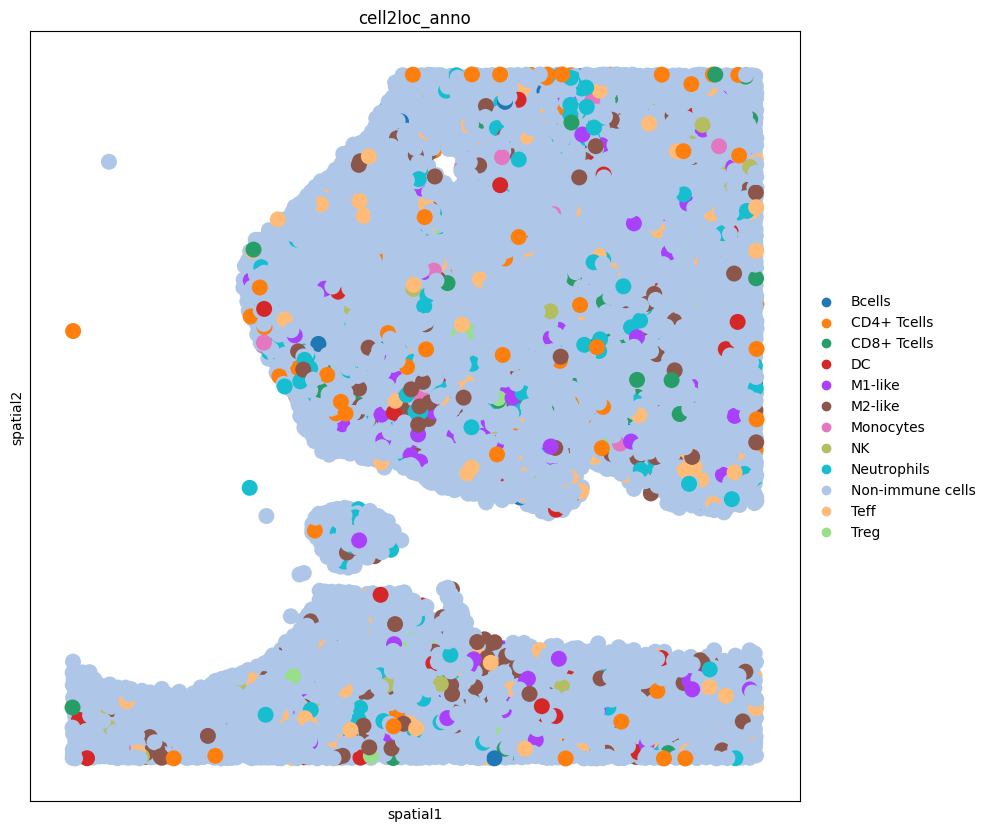

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:11<00:00,  1.04it/s]


AnnData object with n_obs × n_vars = 13489 × 10177
    obs: '_indices', '_scvi_batch', '_scvi_labels', 'Bcells', 'CD4+ Tcells', 'CD8+ Tcells', 'Non-immune cells', 'DC', 'M1-like', 'M2-like', 'Monocytes', 'NK', 'Neutrophils', 'Teff', 'Treg', 'cell2loc_anno'
    var: 'MT_gene'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'mod', 'cell2loc_anno_colors'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

<Figure size 800x800 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [1]:
## Annotate the second data
from stereosite.read.gem import Gem_Reader
from stereosite.cn.deconvolution import Cell2location
gem_file = "./data/SS200000681TL_A1_1.tissue.part.gem.gz"
gem_reader = Gem_Reader(gem_file)

#If cellbin mask was available, use mask to extract gene expression matrix of each cell.
mask_file = "./data/SS200000681TL_A1_mask_1.part.tif"
adata_1 = gem_reader.gem_with_cellmask_2anndata(mask_file)
adata_1_file = "./data/SS200000681TL_A1_cellbin_1.h5ad"
adata_1.write(adata_1_file)
ref_file = "./data/CT26_scCell_reference.csv"
out_dir = "./data/deconvolution/cellbin_1"
cell2loc = Cell2location(ref_file, adata_1_file, out_dir = out_dir, bin_size = 1, gpu = 0)
cell2loc.run_deconvolution()

## CN Based On Annotated Cellbin Data
Use the annotated cellbin data instead of deconvolution result of square bin to dissect the CNs.

In [6]:
from stereosite.cn.cellneighbor import cn_cellbin
adata_anno = anndata.read("./data/deconvolution/cellbin/cell2location_map/sp.h5ad")
cn_cellbin(adata_anno, 400, n_neighbors = 20, resolution = 0.4, min_dist = 0.1)

... storing 'bin_cor' as categorical


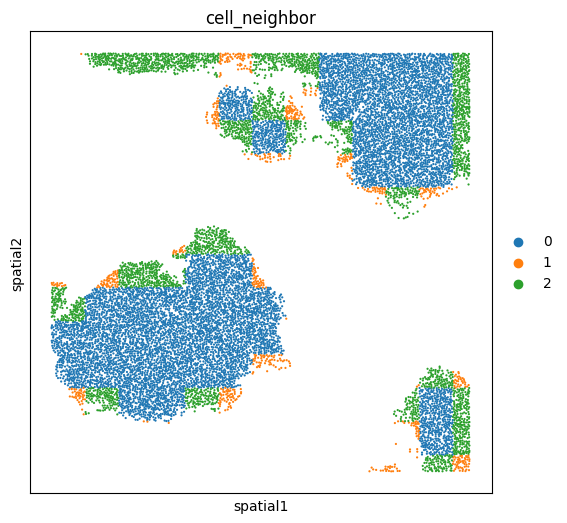

In [7]:
#CN result visualization
from stereosite.plot.cellneighbor import umap, heatmap, spatial
spatial(adata_anno, spot_size=20)

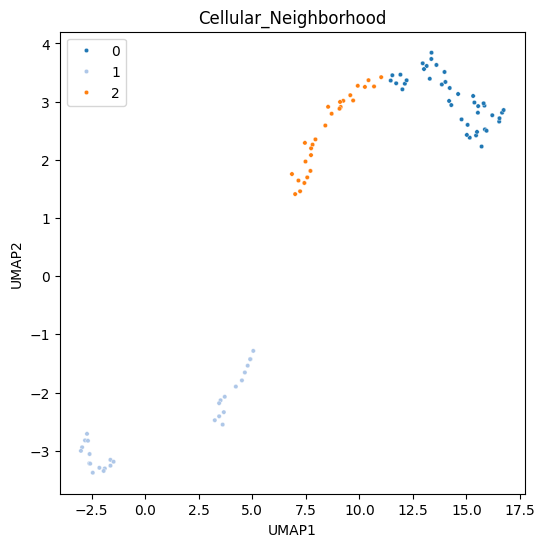

In [8]:
umap(adata_anno)

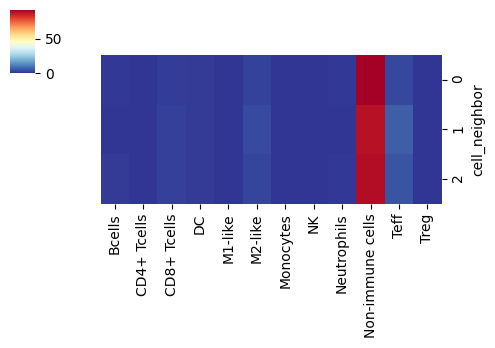

In [9]:
heatmap(adata_anno)

## SCII
Spatial cell interaction intensity

The annotated cellbin or square bin at single-cell resolution data is required.

In [25]:
from stereosite.scii import intensities_count
import anndata
interactiondb_file = "./data/CellChatDB.mouse.csv"
adata_anno_file = "./data/deconvolution/cellbin/cell2location_map/sp.h5ad"
adata_anno = anndata.read(adata_anno_file)
scii_dict = intensities_count(adata_anno, interactiondb_file, 
                              distance_threshold = {'Secreted Signaling': 200, 'ECM-Receptor': 200, 'Cell-Cell Contact': 30},
                              distance_coefficient = {'Secreted Signaling': 1, 'ECM-Receptor': 0.1, 'Cell-Cell Contact': 0},
                              anno = 'cell2loc_anno')

/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
2024-06-06 10:41:25,526 - INFO - generate LRpairs finished, and get 3 LRpair
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/squidpy-1.4.1-py3.10.egg/squidpy/gr/_utils.py:200: ImplicitModificationWarning: Setting element `.obsp['400_connectivities']` of view, initializing view as actual.
  obj[key] = data
2024-06-06 10:41:33,427 - INFO - interaction intensity count begin.
2024-06-06 10:41:33,429 - INFO - compute the interaction intensity of LRpairs Secreted Signaling
2024-06-06 10:47:57,988 - INFO - compute the interaction intensity of LRpairs ECM-Receptor
2024-06-06 10:53:01,992 - INFO - compute the interaction intensity of LRpairs Cell-Cell Contact
2024-06-06 10:56:12,701 - INFO - 

In [2]:
## The interaction data can be writen into a pickle file.
## When you want to visualize the interaction data after some time, 
## the data can be load from the pickle file by pickle package directely.
import pickle
os.makedirs("./out/scii", exist_ok=True)
interaction_file = "./out/scii/interactions.pkl"
with open(interaction_file, 'wb') as writer:
    pickle.dump(scii_dict, writer)
with open(interaction_file, 'rb') as reader:
    scii_dict = pickle.load(reader)

/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/plot/scii.py:371: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for cls, size in (pvals.groupby(level=0, axis=1)).size().to_dict().items():
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


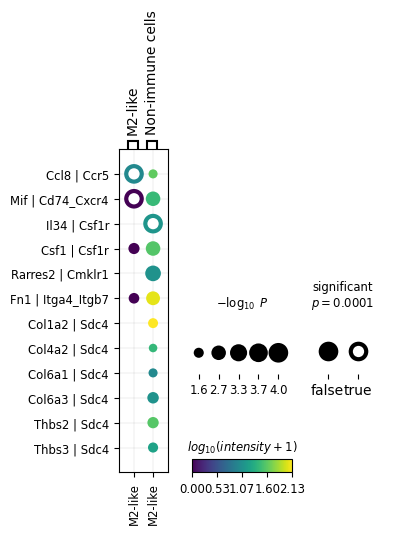

In [27]:
#SCII result visualization
from stereosite.plot.scii import ligrec
import numpy as np
ligrec(scii_dict,
    intensities_range=(8, np.inf),
    pvalue_threshold=0.05,
    alpha=1e-4,
    swap_axes=False,
    source_groups=["Non-immune cells", 'Treg', 'M1-like', 'M2-like', 'Teff'],
    target_groups = ["Neutrophils", "CD4+ Tcells", 'CD8+ Tcells', 'M2-like'],
    title=" ",
)

134

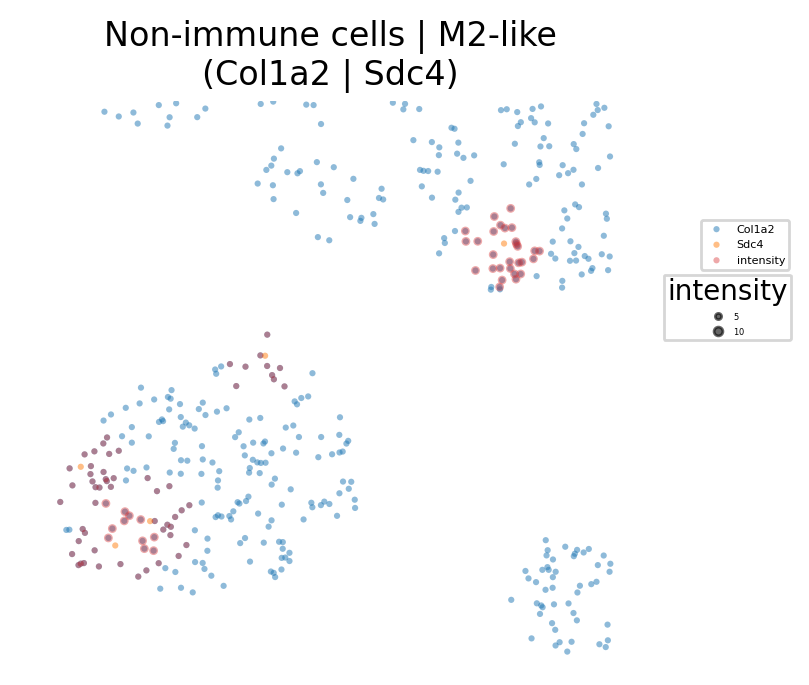

In [28]:
adata_anno_raw = adata_anno.raw.to_adata()
#show intensity of interaction meidated by specific LR pair and between specific cells in situ
from stereosite.plot.intensity import intensity_insitu
cells = ['Non-immune cells', 'M2-like']
genes = ['Col1a2', 'Sdc4']
intensity_insitu(adata_anno_raw, cells, genes, radius = 200, distance_coefficient=1, spot_size=5)

## SCIITensor
### Single sample analysis
dicipher tumor microenvironment by deconvoluting spatial cellular interaction intensity

In [1]:
from stereosite import scii_tensor
import anndata
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scanpy as sc

Global seed set to 0
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/ldfssz1/ST_BIGDATA/USER/liuxing2/software/miniconda3/envs/stereosite/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
## Generate interactiontensor object and evaluate the optimal combination of ranks
adata = anndata.read("./data/deconvolution/cellbin/cell2location_map/sp.h5ad")
interactionDB = "./data/CellChatDB.mouse.csv"
sct = scii_tensor.InteractionTensor(adata, interactionDB=interactionDB)
radius = {'Secreted Signaling': 100, 'ECM-Receptor': 100, 'Cell-Cell Contact': 30}
scii_tensor.build_SCII(sct, radius=radius, window_size=200, anno_col='cell2loc_anno')
scii_tensor.process_SCII(sct, zero_remove=True, log_data=True)
reconstruction_errors = scii_tensor.evaluate_ranks(sct, use_gpu=True, device='cuda:1')

2024-05-23 13:39:20,074 - INFO - Filter LR genes
2024-05-23 13:39:20,562 - INFO - Create spatial neighbor graph
2024-05-23 13:39:25,399 - INFO - Start build SCII matrix
100%|█████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:41<00:00,  2.35it/s]
2024-05-23 13:40:06,694 - INFO - Finish build CCI matrix - time cost 0.012953767047988044 h
2024-05-23 13:40:06,746 - INFO - 9 window, 270 lrpair, 90 cellpair have zero intensity
2024-05-23 13:40:06,859 - INFO - Finish processing LR matrix - time cost 4.5288602511088057e-05 h
100%|█████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:34<00:00,  1.94s/it]
2024-05-23 13:41:15,081 - INFO - Finish eval SCII tensor rank - time cost 0.018950531813833448 h


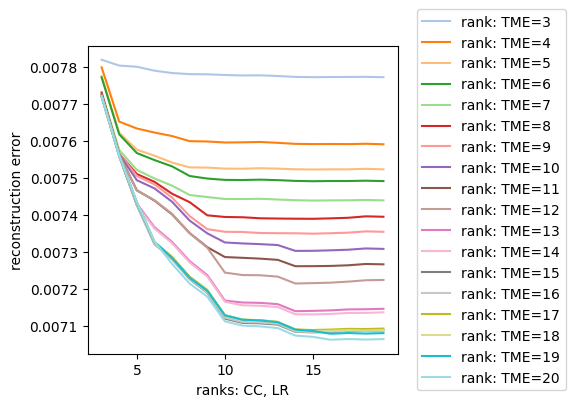

In [3]:
## visualize the reconstruction errors using line plot
from stereosite.plot.scii_tensor import reconstruction_error_line
reconstruction_error_line(reconstruction_errors, figsize=(4, 4))

In [4]:
## decompose the interaction tensor with optimal combination of ranks
scii_tensor.SCII_Tensor(sct, rank=[15, 15, 15], device='cuda:0')
with open("out/scii_tensor_res.pkl", "wb") as f:
    pickle.dump(sct, f)

2024-05-23 13:41:29,571 - INFO - Finish SCII tensor - time cost 0.0037824999623828465 h


In [5]:
## The output result can be loaded from the file
with open("out/scii_tensor_res.pkl", "rb") as f:
    sct = pickle.load(f)

### visualization

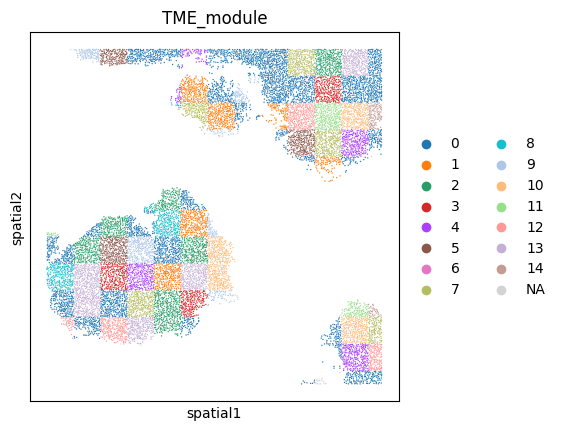

In [6]:
## spatial distribution of each TME module
import scanpy as sc
sc.pl.spatial(sct.adata, color='TME_module', img_key=None, spot_size=20)

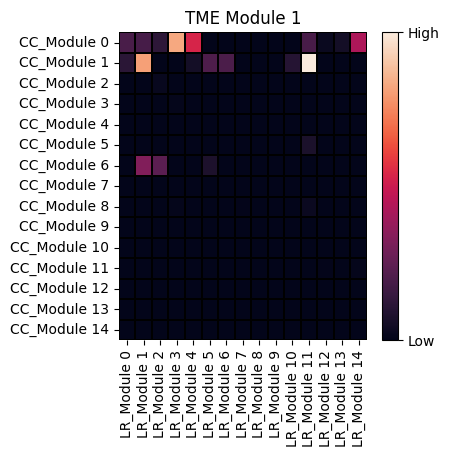

In [7]:
## core heatmap
from stereosite.plot.scii_tensor import tme_core_heatmap
tme_core_heatmap(sct.core, tme_number=1, figsize=(4, 4))

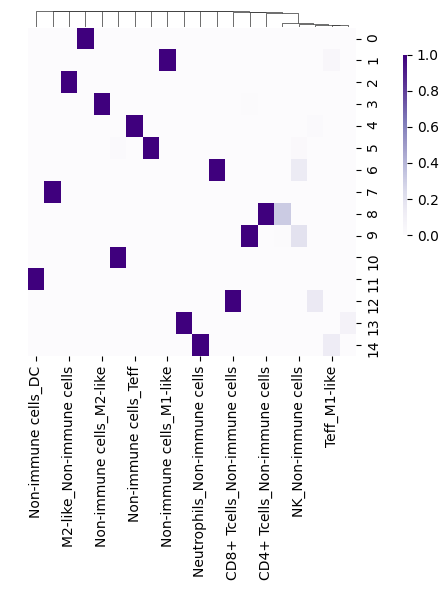

In [8]:
## cell-cell factor heatmap
from stereosite.scii_tensor import top_pair
import seaborn as sns
import matplotlib.pyplot as plt
top_cc_pair = top_pair(sct, pair='cc', top_n=20)
fig = sns.clustermap(top_cc_pair.T, cmap="Purples", standard_scale=0, metric='euclidean', method='ward', 
                     row_cluster=False, dendrogram_ratio=0.05, cbar_pos=(1.02, 0.6, 0.01, 0.3),
                     figsize=(4, 6),
                     )

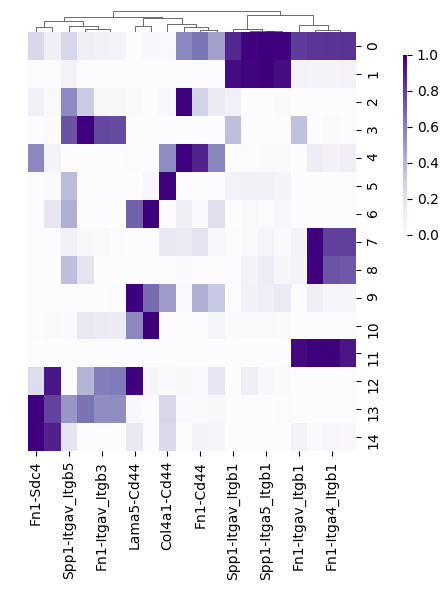

In [9]:
## ligand-receptor factor heatmap
top_lr_pair = top_pair(sct, pair='lr', top_n=20)
fig = sns.clustermap(top_lr_pair.T, cmap="Purples", standard_scale=0, metric='euclidean', method='ward', 
                     row_cluster=False, dendrogram_ratio=0.05, cbar_pos=(1.02, 0.6, 0.01, 0.3),
                     figsize=(4, 6),
                     )

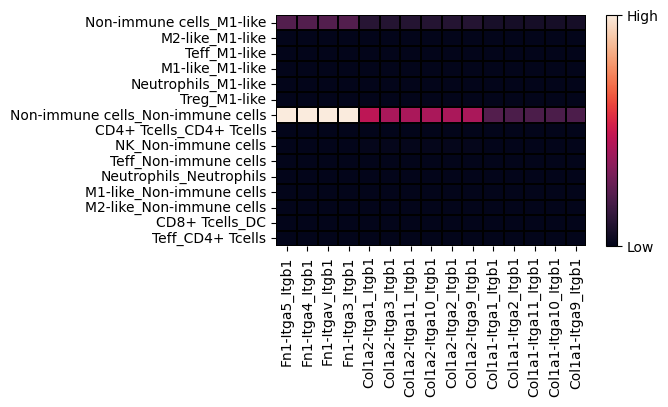

In [10]:
## visualize selected interactions using heatmap
from stereosite.plot.scii_tensor import interaction_heatmap
interactions = scii_tensor.interaction_select(sct,
                                              tme_module=1,
                                              cellpair_module=1,
                                              lrpair_module=11, n_lr=15, n_cc=15)
interaction_heatmap(interactions, figsize=(5, 3), vmax=50)

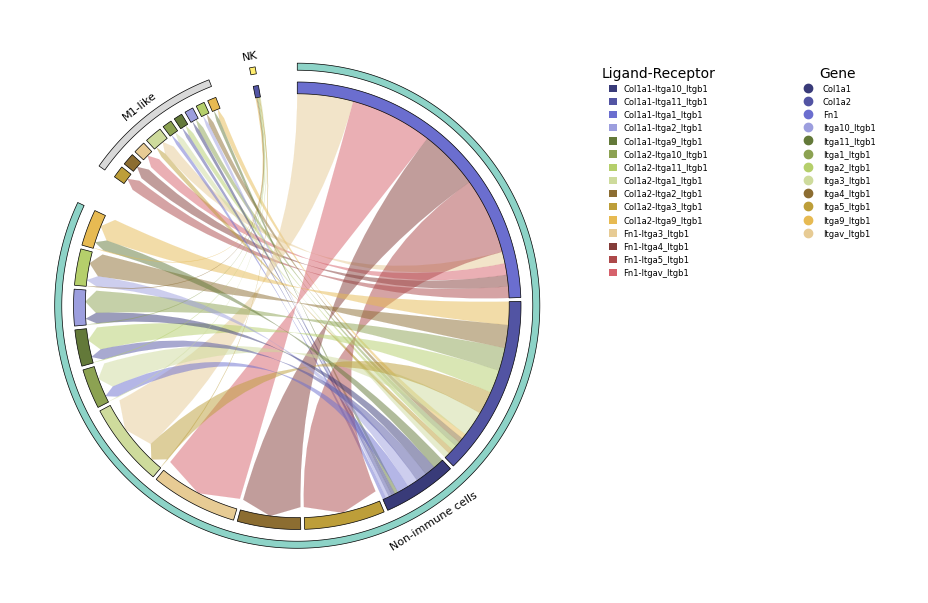

In [11]:
##visualize selected interactions using circle plot
from stereosite.plot.scii_circos import cells_lr_circos, cells_circos, lr_circos
cells = adata.obs['cell2loc_anno'].unique()
cells_lr_circos(interactions, cells=cells)

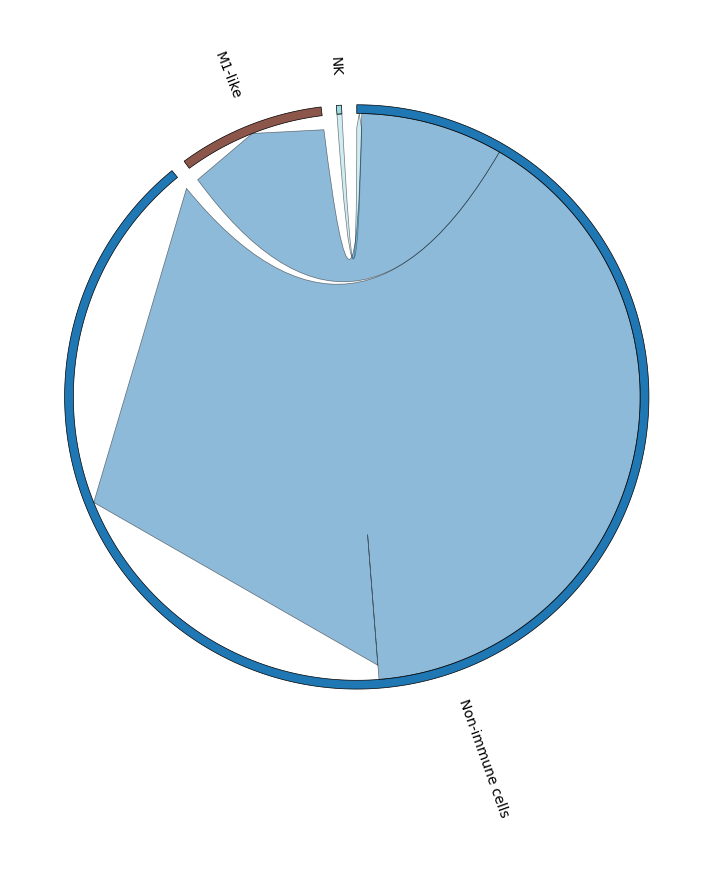

In [12]:
## circos only contain cell types and the links between them
cells_circos(interactions, cells=cells)

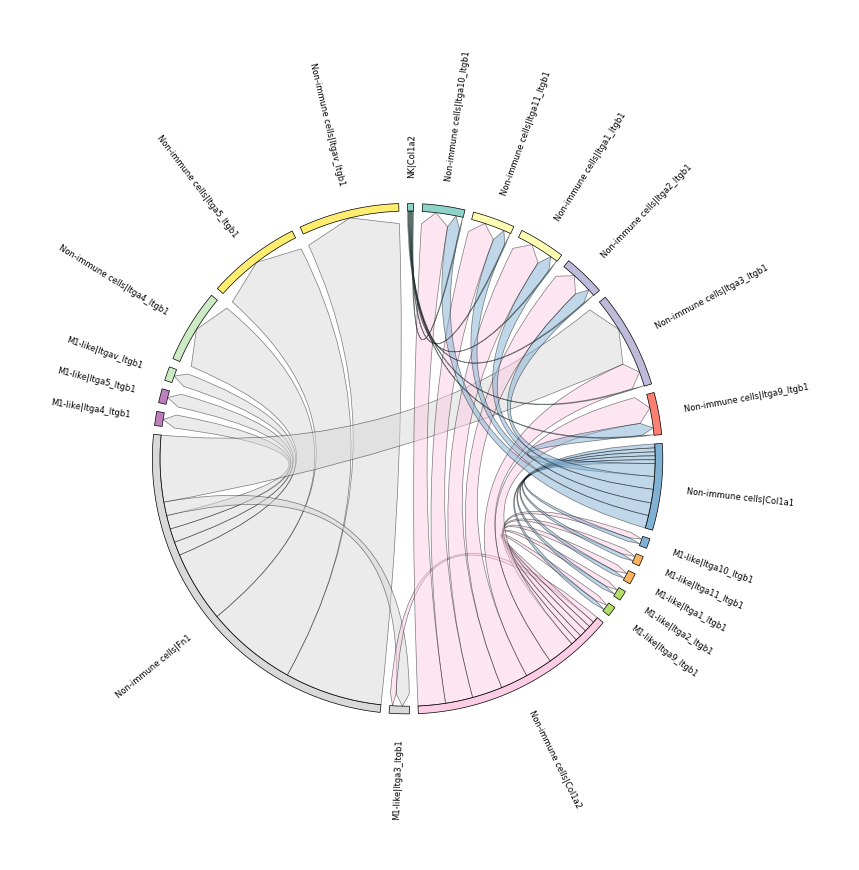

In [13]:
## circos only contain ligand-receptor genes
lr_circos(interactions, cells=cells)

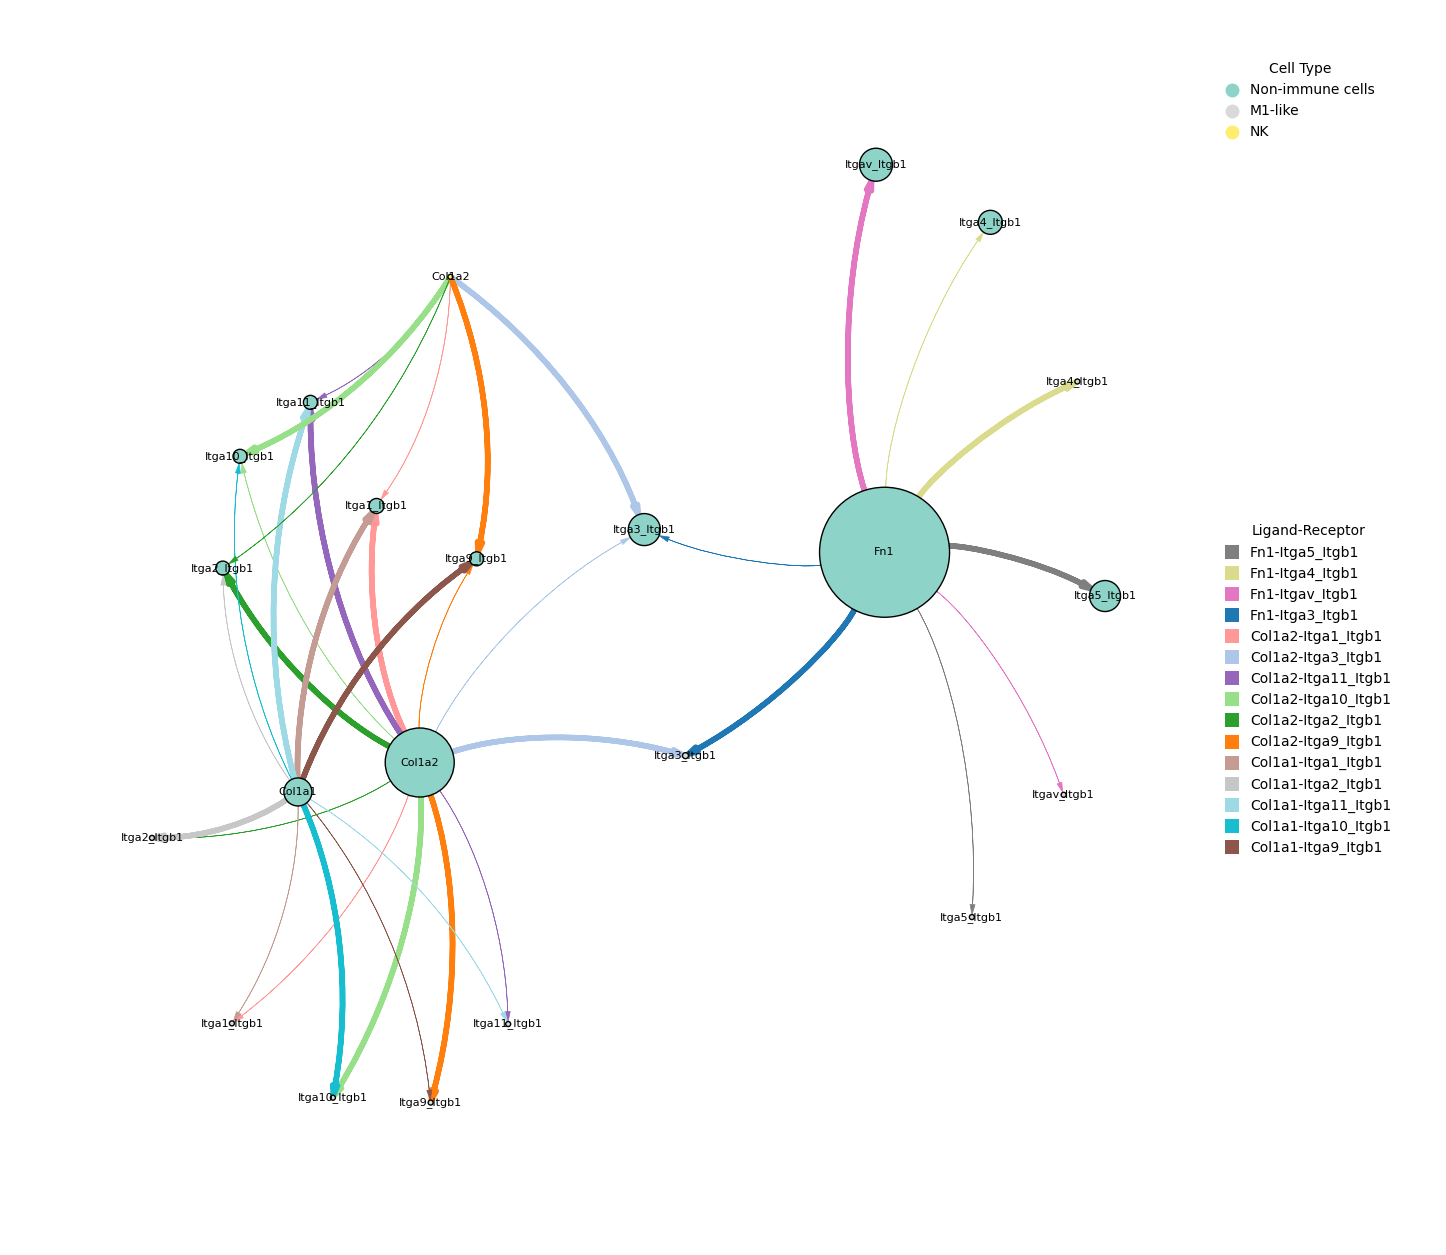

In [14]:
## visualize selected interactions using network plot
from stereosite.plot.scii_net import grap_plot
grap_plot(interactions, cells)

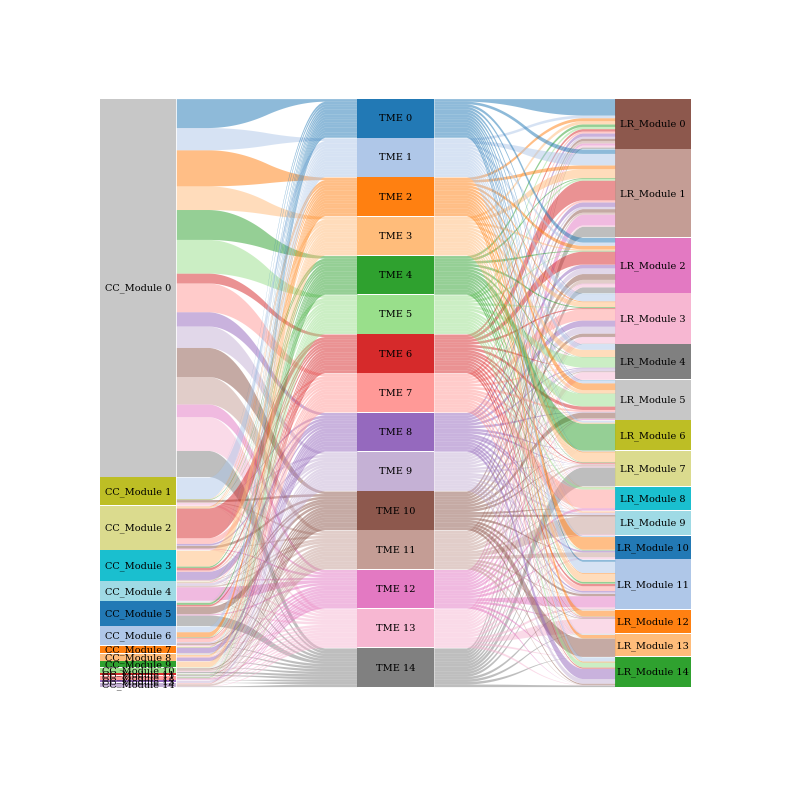

In [15]:
## sankey
from stereosite.plot import sankey
core_df = sankey.core_process(sct.core)
sankey.sankey_3d(core_df, link_alpha=0.5, interval=0.001)

## SCIITensor
### multiple sample analysis


In [16]:
## decompose another sample data
## evaluate the optimal combination of ranks
adata_1 = anndata.read("./data/deconvolution/cellbin_1/cell2location_map/sp.h5ad")
interactionDB = "./data/CellChatDB.mouse.csv"
sct_1 = scii_tensor.InteractionTensor(adata_1, interactionDB=interactionDB)
radius = {'Secreted Signaling': 100, 'ECM-Receptor': 100, 'Cell-Cell Contact': 30}
scii_tensor.build_SCII(sct_1, radius=radius, window_size=200, anno_col='cell2loc_anno')
scii_tensor.process_SCII(sct_1, zero_remove=True, log_data=True)
reconstruction_errors = scii_tensor.evaluate_ranks(sct_1, use_gpu=True, device='cuda:1')

2024-05-22 15:37:26,215 - INFO - Filter LR genes
2024-05-22 15:37:26,400 - INFO - Create spatial neighbor graph
2024-05-22 15:37:36,777 - INFO - Start build SCII matrix
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [01:37<00:00,  1.81s/it]
2024-05-22 15:39:14,308 - INFO - Finish build CCI matrix - time cost 0.03002927839756012 h
2024-05-22 15:39:14,354 - INFO - 3 window, 161 lrpair, 8 cellpair have zero intensity
2024-05-22 15:39:14,461 - INFO - Finish processing LR matrix - time cost 4.209048218197292e-05 h
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:14<00:00,  4.13s/it]
2024-05-22 15:40:29,023 - INFO - Finish eval SCII tensor rank - time cost 0.020711042218738134 h


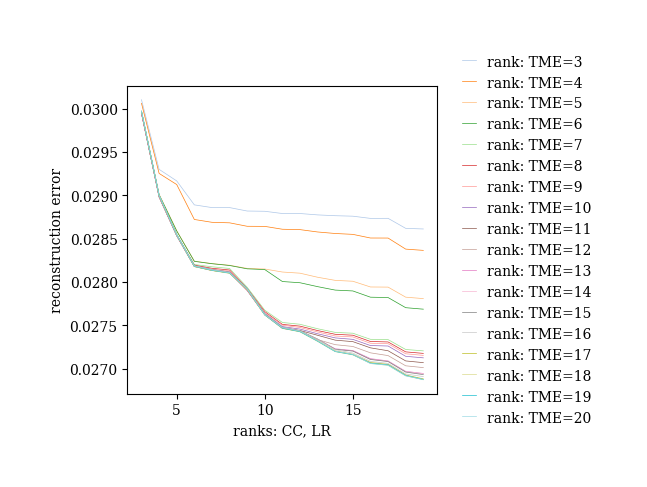

In [17]:
## visualize the reconstruction errors using line plot
from stereosite.plot.scii_tensor import reconstruction_error_line
reconstruction_error_line(reconstruction_errors, figsize=(4, 4))

In [18]:
scii_tensor.SCII_Tensor(sct_1, rank=(20, 20, 13), device='cuda:0')
with open("out/scii_tensor_res_1.pkl", "wb") as f:
    pickle.dump(sct_1, f)

2024-05-22 15:43:32,642 - INFO - Finish SCII tensor - time cost 0.00049119147989485 h


In [3]:
## The output result can be loaded from the file
with open("out/scii_tensor_res_1.pkl", "rb") as f:
    sct_1 = pickle.load(f)

In [19]:
## merge decomposed matrices
sct_merge = scii_tensor.merge_data([sct, sct_1], patient_id=['p1' ,'p2'])

In [20]:
reconstruction_errors = scii_tensor.evaluate_ranks(sct_merge, num_TME_modules=20, use_gpu=True, device='cuda:0')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:35<00:00,  1.97s/it]
2024-05-22 15:44:33,022 - INFO - Finish eval SCII tensor rank - time cost 0.01016045007440779 h


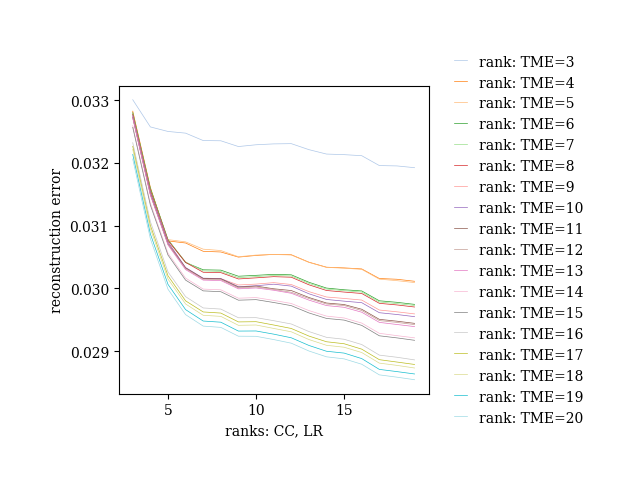

In [21]:
## visualize the reconstruction errors
from stereosite.plot.scii_tensor import reconstruction_error_line
reconstruction_error_line(reconstruction_errors, figsize=(4, 4))

In [28]:
scii_tensor.SCII_Tensor_multiple(sct_merge, rank=[15,15,10], device='cuda:1')

2024-05-22 15:51:54,606 - INFO - Finish multiple sample SCII tensor - time cost 9.944750203026665e-05 h


... storing 'tmp' as categorical


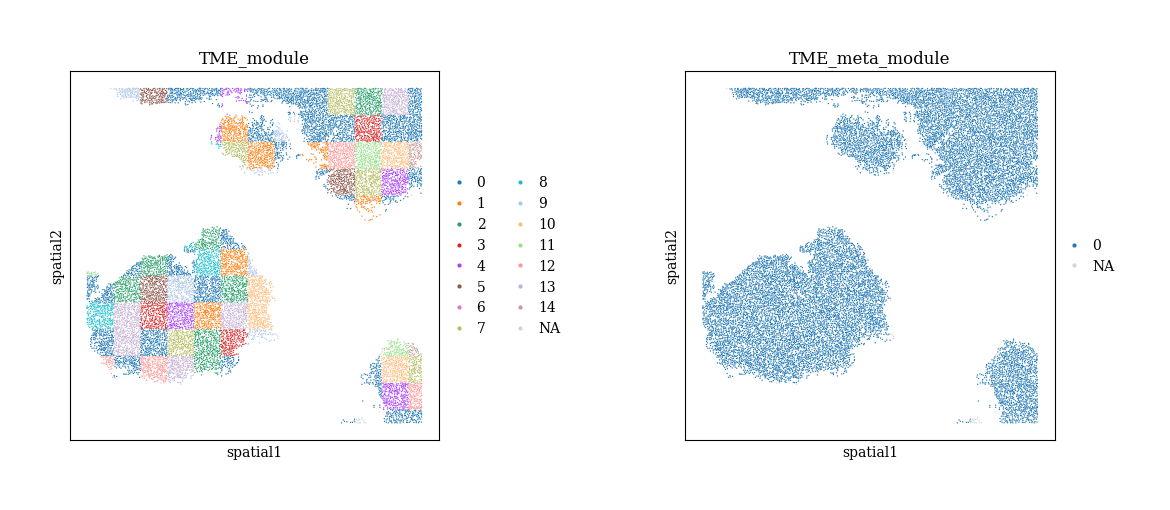

In [29]:
## spatial distribution of meta-module
sc.pl.spatial(sct_merge.adata[0], color=['TME_module', 'TME_meta_module'], img_key=None, spot_size=20)

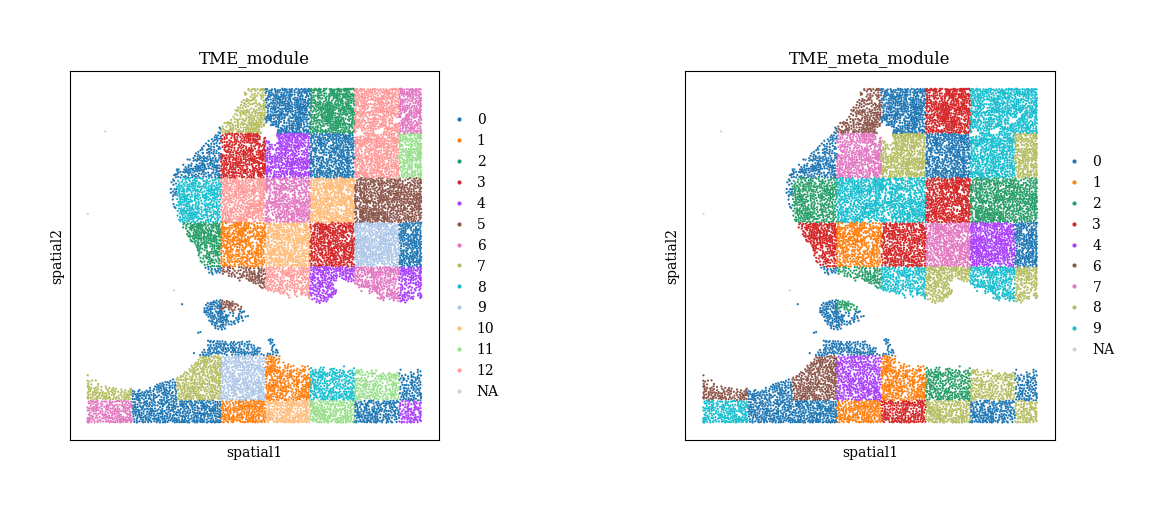

In [30]:
sc.pl.spatial(sct_merge.adata[1], color=['TME_module', 'TME_meta_module'], img_key=None, spot_size=20)

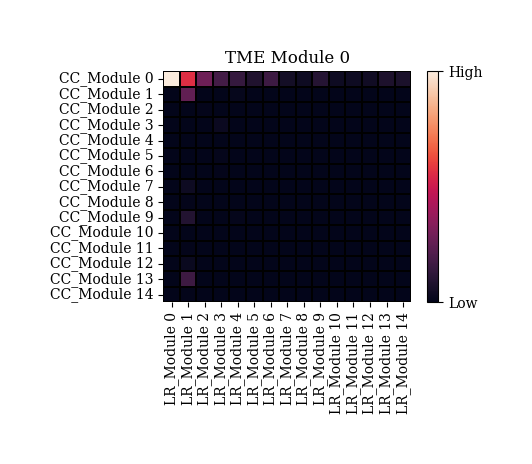

In [32]:
## core heatmap
from stereosite.plot.scii_tensor import tme_core_heatmap
tme_core_heatmap(sct_merge.core, tme_number=0, figsize=(4, 3))

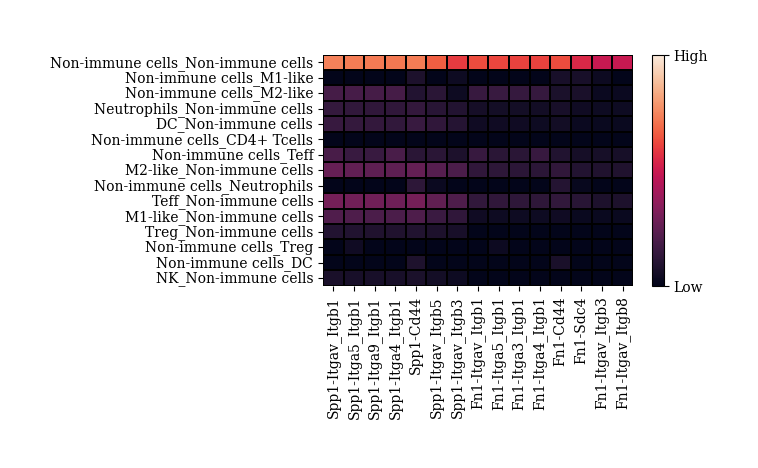

In [33]:
## visualize selected interactions using heatmap
from stereosite.plot.scii_tensor import interaction_heatmap
interactions = scii_tensor.interaction_select_multiple(sct_merge,
                                                       tme_module=0, sample='p2', 
                                                       cellpair_module=0, 
                                                       lrpair_module=1, n_lr=15, n_cc=15)
interaction_heatmap(interactions, figsize=(5, 3), vmax=10)

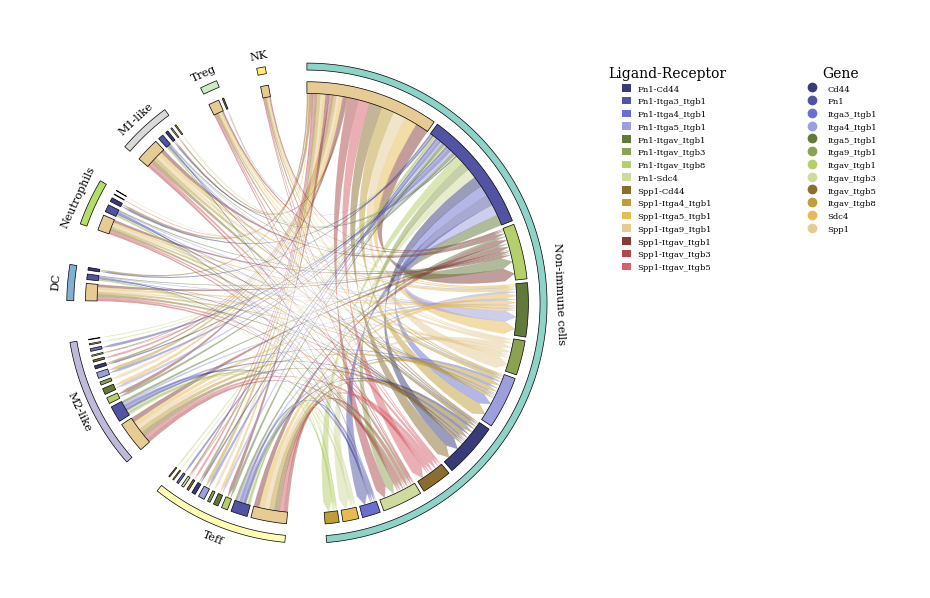

In [34]:
##visualize selected interactions using circle plot
from stereosite.plot.scii_circos import cells_lr_circos, cells_circos, lr_circos
cells = adata.obs['cell2loc_anno'].unique()
cells_lr_circos(interactions, cells=cells)